In [57]:
import numpy as np
import poisson_hypergraph
import xgi
import matplotlib.pyplot as plt
from matplotlib import colormaps as cm
from importlib import reload
import math

# Define functions

In [78]:
def generate_graph(true_theta, timesteps):
    true_p, true_q, gamma_nu, gamma_nr, gamma_eu, gamma_er = true_theta
    H = xgi.Hypergraph([[0, 1]])
    H.set_node_attributes({0 : 0, 1 : 1}, name = "label")
    GH = poisson_hypergraph.GH(H, [0, 1], true_p, true_q)
    GH.add_hyperedge(timesteps, gamma_nu, gamma_nr, gamma_eu, gamma_er)
    return GH

In [79]:
def e_prime_prob(GH, e_prime_index, theta):
    edges = GH.get_edges()
    e_prime = edges[e_prime_index]
    summation = 0
    for e_index in range(e_prime_index):
        e = edges[e_index]
        for u_index in e and e_prime:
            summation += GH.likelihood(e_index, u_index, e_prime_index, theta)
    return summation

In [172]:
def p_q_likelihoods(GH, grain, gammas):
    edges = GH.get_edges()
    step = 1 / grain

    gamma_nu, gamma_nr, gamma_eu, gamma_er = gammas

    p_seq = np.arange(0 + step, 1, step = step)
    q_seq = np.arange(0 + step, 1, step = step)

    likelihood_values = np.zeros((grain - 1, grain - 1))

    for p_index in range(grain - 1):
        p = p_seq[p_index]
        print(p)
        for q_index in range(grain - 1):
            q = q_seq[q_index]
            theta = [p, q, gamma_nu, gamma_nr, gamma_eu, gamma_er]
            this_likelihood = 0
            for e_prime_index in range(1, len(edges)):
                this_likelihood += np.log(e_prime_prob(GH, e_prime_index, theta))
            likelihood_values[q_index, p_index] = this_likelihood
    
    return likelihood_values

In [170]:
def make_plot(lik_values, grain):
    step = int(grain/10)

    fig4,ax4 = plt.subplots(1,1)
    cmap = cm['hot']
    cmap.set_bad('black',1.)
    img = plt.imshow(lik_values, cmap=cmap, interpolation='nearest', origin = "lower")
    ax4.set_xticks(list(range(0, grain - 1, step)))
    ax4.set_yticks(list(range(0, grain - 1, step)))
    ax4.set_xticklabels([.1, .2, .3, .4, .5, .6, .7, .8, .9], rotation=90)
    ax4.set_yticklabels([.1, .2, .3, .4, .5, .6, .7, .8, .9])
    ax4.set_xlabel("p")
    ax4.set_ylabel("q")
    plt.show()

In [189]:
def experiment(true_p, true_q, timesteps, grain):
    gamma_nu, gamma_nr, gamma_eu, gamma_er = 0.75, 0.25, 0.75, 0.25
    true_theta = [true_p, true_q, gamma_nu, gamma_nr, gamma_eu, gamma_er]
    GH = generate_graph(true_theta, timesteps)

    lik_values = p_q_likelihoods(GH, grain, [gamma_nu, gamma_nr, gamma_eu, gamma_er])

    return(lik_values)

# Create Heatmaps

In [190]:
lik_values = experiment(0.9, 0.9, 500, 10)

0.1
0.2
0.30000000000000004
0.4
0.5
0.6
0.7000000000000001
0.8
0.9


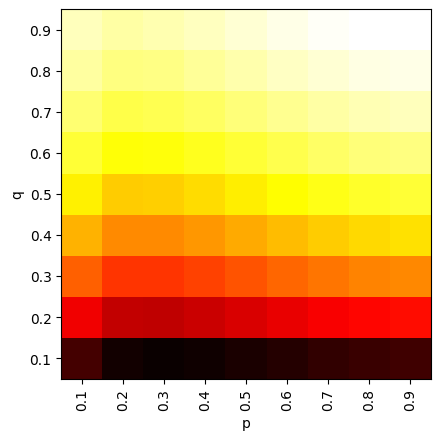

In [191]:
make_plot(lik_values, grain = 10)

In [192]:
lik_values = experiment(0.5, 0.5, 500, 10)

0.1
0.2
0.30000000000000004
0.4
0.5
0.6
0.7000000000000001
0.8
0.9


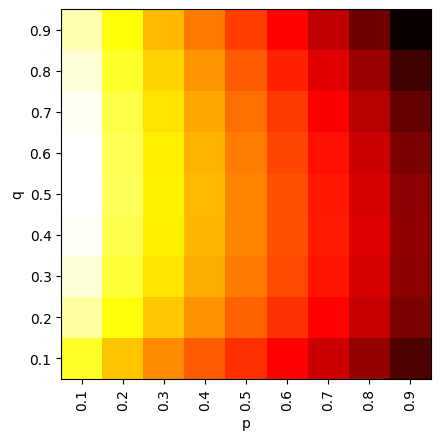

In [193]:
make_plot(lik_values, grain = 10)

In [195]:
lik_values = experiment(0.1, 0.1, 500, 10)

0.1
0.2
0.30000000000000004
0.4
0.5
0.6
0.7000000000000001
0.8
0.9


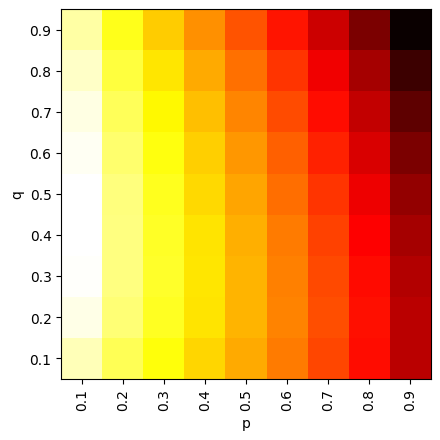

In [181]:
make_plot(lik_values, grain)

In [215]:
lik_values = experiment(0.9, 0.1, 500, 10)

0.1
0.2
0.30000000000000004
0.4
0.5
0.6
0.7000000000000001
0.8
0.9


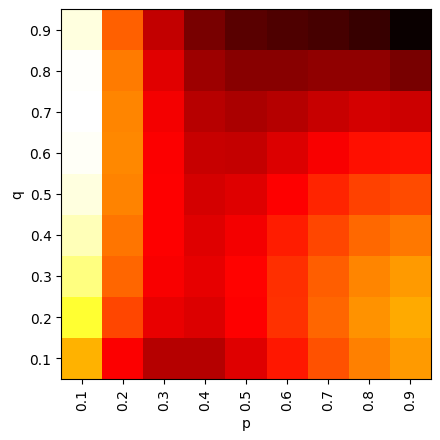

In [216]:
make_plot(lik_values, grain)

In [217]:
lik_values = experiment(0.1, 0.9, 500, 10)

0.1
0.2
0.30000000000000004
0.4
0.5
0.6
0.7000000000000001
0.8
0.9


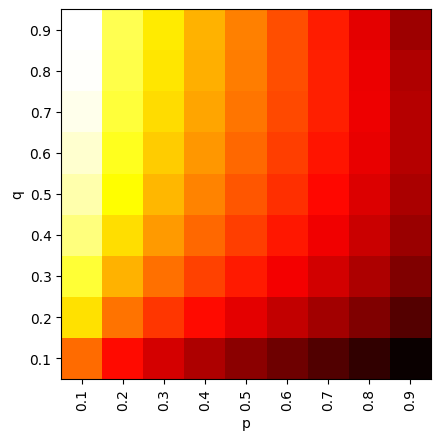

In [218]:
make_plot(lik_values, grain)